## Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score, recall_score, precision_score
# from imblearn.combine import SMOTETomek

## Load data

In [2]:
# load data
df = pd.read_csv("./bank/bank_training.csv", engine='python', encoding='utf-8')
df.head()

,age,job,marital,education,has_credit,avg_year_balance,contact_type,day,month,num_compaign_contact,num_prev_contact,prev_compaign_outcome,target
0,58,4,1,2,0,2143,3,5,8,1,0,2,0
1,44,9,2,1,0,29,3,5,8,1,0,2,0
2,33,2,1,1,0,2,3,5,8,1,0,2,0
3,47,1,1,3,0,1506,3,5,8,1,0,2,0
4,33,11,2,3,0,1,3,5,8,1,0,2,0


## Feature Selection - Manually

In [3]:
# number of compaign contacts, can be removed, don't find it a usually feature for the model
# YOU CAN ALSO REMOVE SOME FEATURES, BY CHECKING THE CORRELATIONS OF THAT FEATURE WITH OTHER FEATURES or WITH THE LABELS
df.drop(columns=['num_compaign_contact'], inplace=True)
df.head()


,age,job,marital,education,has_credit,avg_year_balance,contact_type,day,month,num_prev_contact,prev_compaign_outcome,target
0,58,4,1,2,0,2143,3,5,8,0,2,0
1,44,9,2,1,0,29,3,5,8,0,2,0
2,33,2,1,1,0,2,3,5,8,0,2,0
3,47,1,1,3,0,1506,3,5,8,0,2,0
4,33,11,2,3,0,1,3,5,8,0,2,0


## Classes Distribution

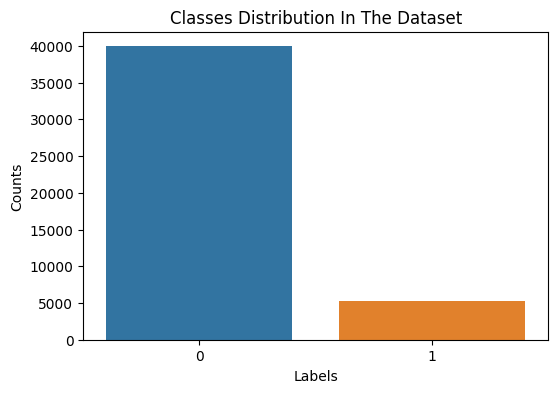

In [4]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='target')
plt.title("Classes Distribution In The Dataset")
plt.xlabel("Labels")
plt.ylabel("Counts")
plt.show()

## Balance classes - SMOTETomek links

In [5]:
# you can use oversample, or resample from sklearn.utils import resample, also helps.
targets = df['target']
df.drop( columns=['target'], inplace=True)

In [6]:
targets.unique()

array([0, 1])

In [7]:
# dataset-features dont have labels anymore
df.head()

,age,job,marital,education,has_credit,avg_year_balance,contact_type,day,month,num_prev_contact,prev_compaign_outcome
0,58,4,1,2,0,2143,3,5,8,0,2
1,44,9,2,1,0,29,3,5,8,0,2
2,33,2,1,1,0,2,3,5,8,0,2
3,47,1,1,3,0,1506,3,5,8,0,2
4,33,11,2,3,0,1,3,5,8,0,2


## seperate data

In [8]:
x_train, x_test, y_train, y_test = train_test_split(df, targets, test_size=.2, random_state=43)

In [9]:
gb_clf_obj = GradientBoostingClassifier(n_estimators=150, learning_rate=.0001, max_depth=5, random_state=43 )

In [10]:
gb_clf_obj.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.0001, max_depth=5, n_estimators=150,
                           random_state=43)

In [11]:
y_pred = gb_clf_obj.predict(x_test)

In [12]:
accuracy_score(y_test, y_pred)

0.8826716797522945

In [13]:
print(classification_report(y_test, y_pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      7982
           1       1.00      0.00      0.00      1061

    accuracy                           0.88      9043
   macro avg       0.94      0.50      0.47      9043
weighted avg       0.90      0.88      0.83      9043



In [14]:
precision_score(y_test, y_pred, zero_division=1)

1.0

In [15]:
recall_score(y_test, y_pred, zero_division=1)

0.0

In [16]:
f1_score(y_test, y_pred, zero_division=1 )

0.0